# Análisis exploratorio de las variables climáticas y epidemiológicas

In [125]:
# 1. Importar librerias 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.arima.model import ARIMA

In [126]:
# 2. Carga de datos climáticos 
df1 = pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos climáticos\Datos_climáticos-(2022-2024).xlsx")

In [127]:
# 3. Ver las primeras filas
print("Primeras filas:")
print(df1.head())

Primeras filas:
    Año  Día  Temperatura  Temperatura máxima  Temperatura mínima  \
0  2022    1        28.46               34.23               24.03   
1  2022    2        28.61               34.59               24.14   
2  2022    3        29.07               35.43               23.91   
3  2022    4        29.65               36.10               24.19   
4  2022    5        29.24               35.75               23.76   

   Humedad relativa  Precipitación  Velocidad del viento  \
0             71.51           0.33                  0.09   
1             71.87           0.91                  0.12   
2             69.46           0.11                  0.12   
3             63.86           0.00                  0.12   
4             64.06           0.01                  0.13   

   Velocidad de viento máximo  Velocidad de viento mínima  
0                        0.21                        0.01  
1                        0.24                        0.02  
2                        0.3

In [128]:
# 4. Información general
print("\nInformación del DataFrame:")
print(df1.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         1096 non-null   int64  
 1   Día                         1096 non-null   int64  
 2   Temperatura                 1096 non-null   float64
 3   Temperatura máxima          1096 non-null   float64
 4   Temperatura mínima          1096 non-null   float64
 5   Humedad relativa            1096 non-null   float64
 6   Precipitación               1096 non-null   float64
 7   Velocidad del viento        1096 non-null   float64
 8   Velocidad de viento máximo  1096 non-null   float64
 9   Velocidad de viento mínima  1096 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 85.8 KB
None


In [129]:
# 5. Verificar valores nulos
print("\nValores nulos por columna:")
print(df1.isnull().sum())


Valores nulos por columna:
Año                           0
Día                           0
Temperatura                   0
Temperatura máxima            0
Temperatura mínima            0
Humedad relativa              0
Precipitación                 0
Velocidad del viento          0
Velocidad de viento máximo    0
Velocidad de viento mínima    0
dtype: int64


In [130]:
# 6. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df1.describe())


Estadísticas descriptivas:
               Año          Día  Temperatura  Temperatura máxima  \
count  1096.000000  1096.000000  1096.000000         1096.000000   
mean   2023.000912   183.166971    27.237828           30.972801   
std       0.817055   105.510927     1.662275            3.109907   
min    2022.000000     1.000000    23.970000           25.520000   
25%    2022.000000    92.000000    26.080000           28.917500   
50%    2023.000000   183.000000    26.875000           30.050000   
75%    2024.000000   274.250000    27.902500           32.092500   
max    2024.000000   366.000000    34.020000           40.960000   

       Temperatura mínima  Humedad relativa  Precipitación  \
count         1096.000000       1096.000000    1096.000000   
mean            24.375292         85.084763       4.976031   
std              1.032193         10.300241       7.211492   
min             20.800000         52.100000       0.000000   
25%             23.750000         80.677500      

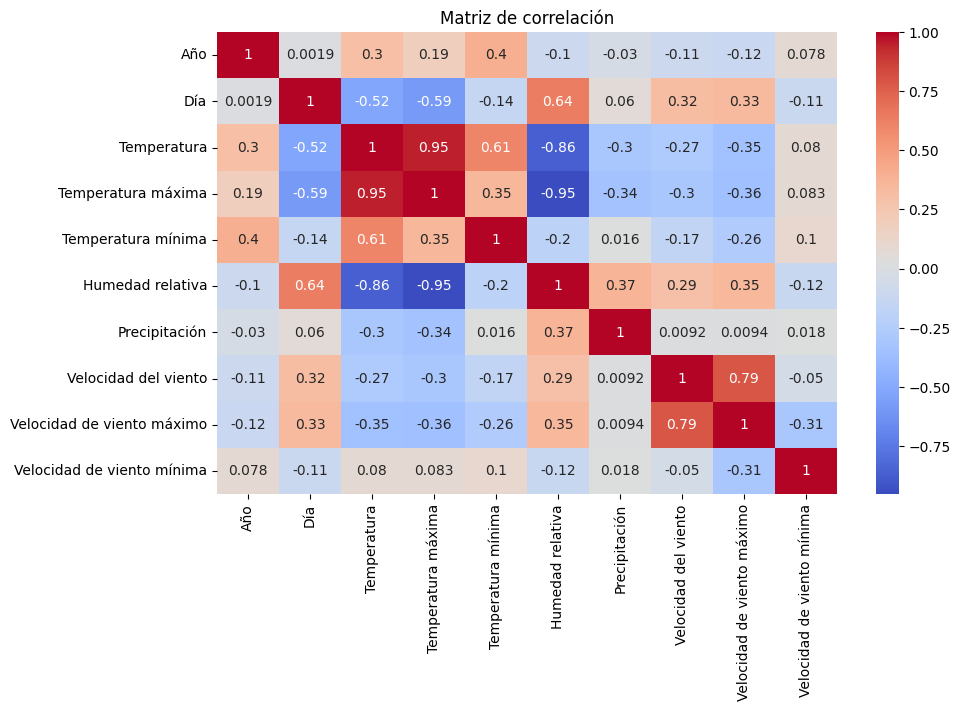

In [131]:
# 7. Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.savefig("matriz_correlacion.png", dpi=300, bbox_inches='tight')  # dpi=300 es buena calidad para impresión
plt.show()

## Convertir datos a escala semanal

In [132]:
# renombrar el atributo día a día del año 

df1.rename(columns={'Día': 'Día del año'}, inplace=True)

In [133]:
df1.head()

,Año,Día del año,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02


In [137]:

from datetime import datetime



# Función para convertir año + día del año a fecha
def dia_del_año_a_fecha(año, dia):
    try:
        return datetime(año, 1, 1) + pd.Timedelta(days=dia - 1)
    except:
        return pd.NaT  # Maneja días inválidos (ej: día 366 en año no bisiesto)

# Aplicar la función y crear columna "fecha"
df1['fecha'] = df1.apply(lambda x: dia_del_año_a_fecha(x['Año'], x['Día del año']), axis=1)

# Formatear como YYYY-MM-DD (opcional, ya que pandas maneja datetime nativamente)
df1['fecha'] = df1['fecha'].dt.strftime('%Y-%m-%d')

df1.head() 

,Año,Día del año,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima,fecha
0,2022,1,28.46,34.23,24.03,71.51,0.33,0.09,0.21,0.01,2022-01-01
1,2022,2,28.61,34.59,24.14,71.87,0.91,0.12,0.24,0.02,2022-01-02
2,2022,3,29.07,35.43,23.91,69.46,0.11,0.12,0.31,0.01,2022-01-03
3,2022,4,29.65,36.10,24.19,63.86,0.00,0.12,0.23,0.04,2022-01-04
4,2022,5,29.24,35.75,23.76,64.06,0.01,0.13,0.24,0.02,2022-01-05


In [138]:
import pandas as pd

# Asumiendo que df1 ya está cargado en memoria

# Paso 1: Eliminar las columnas 'Año' y 'Día del año'
df1 = df1.drop(columns=['Año', 'Día del año'])

# Paso 2: Asegurarse que 'fecha' es de tipo datetime
df1['fecha'] = pd.to_datetime(df1['fecha'])

# Paso 3: Remuestreo a semana epidemiológica (domingo a sábado)
# Primero establecemos 'fecha' como índice
df1.set_index('fecha', inplace=True)

# Definimos la función para determinar la semana epidemiológica
def get_epidemiological_week(date):
    # Semana epidemiológica comienza en domingo (0) y termina en sábado (6)
    return (date - pd.to_timedelta(date.dayofweek + 1, unit='D')).strftime('%Y-%U')

# Remuestreamos por semana epidemiológica
# Usamos 'W-SUN' para que las semanas vayan de domingo a sábado
df_semanal = df1.resample('W-SUN').agg({
    'Temperatura': 'mean',
    'Temperatura máxima': 'max',
    'Temperatura mínima': 'min',
    'Humedad relativa': 'mean',
    'Precipitación': 'sum',
    'Velocidad del viento': 'mean',
    'Velocidad de viento máximo': 'max',
    'Velocidad de viento mínima': 'min'
})

# Resetear el índice para tener 'fecha' como columna nuevamente
df_semanal.reset_index(inplace=True)

# Opcional: Agregar columnas de año y semana epidemiológica
df_semanal['Año epidemiológico'] = df_semanal['fecha'].dt.year
df_semanal['Semana epidemiológica'] = df_semanal['fecha'].dt.isocalendar().week

# Mostrar las primeras filas del resultado
df_semanal.head()



,fecha,Temperatura,Temperatura máxima,Temperatura mínima,Humedad relativa,Precipitación,Velocidad del viento,Velocidad de viento máximo,Velocidad de viento mínima,Año epidemiológico,Semana epidemiológica
0,2022-01-02,28.535000,34.59,24.03,71.690000,1.24,0.105000,0.24,0.01,2022,52
1,2022-01-09,28.128571,36.10,22.75,70.544286,11.47,0.120000,0.31,0.01,2022,1
2,2022-01-16,27.240000,35.01,22.17,73.188571,13.15,0.115714,0.25,0.00,2022,2
3,2022-01-23,29.395714,38.15,23.97,67.442857,1.71,0.112857,0.25,0.01,2022,3
4,2022-01-30,29.078571,36.46,23.30,65.702857,1.97,0.140000,0.29,0.04,2022,4


# Ahora si remuestrearemos los datos climáticos a una escala de semana epidemiológica.
# Script para remuestrear el dataframe df1 a semana epidemiológica (domingo a sábado)



### Explicación:
1. **Eliminación de columnas**: Se eliminan las columnas 'Año' y 'Día del año' como solicitaste.
2. **Conversión de fecha**: Se asegura que la columna 'fecha' sea de tipo datetime.
3. **Remuestreo semanal**: 
   - Se usa `resample('W-SUN')` para agrupar por semanas que comienzan en domingo.
   - Se aplican diferentes funciones de agregación para cada variable:
     - Temperaturas: media para la normal, max/mín para extremos
     - Humedad: media
     - Precipitación: suma acumulada semanal
     - Viento: media para velocidad normal, max/mín para extremos
4. **Columnas adicionales**: Se añaden columnas para identificar el año y número de semana epidemiológica.

El resultado será un dataframe con datos agregados por semana epidemiológica (domingo a sábado) para todo el período 2022-2024.

In [134]:
df2=pd.read_excel(r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Secretaria de salud\BS_DENGUE_SEC_SALUD_2022-2024.xlsx")